# Model's Performance

We need to evaluate of our model's performance after training procedure. In machine learning, a common task is the study and construction of algorithms that can learn from and make predictions on data. The data used to build final model usually comes from multiple datasets. In particular, three datasets are commonly used in different stages of the creation of the model.

We can perform this task by dividing our dataset into 3 parts.

### Training Set

The model is initially fit on a training set. That is a set of examples used to fit the parameters of the model. We can denote the training dataset as 

$$(X,y) = (x^1,y^1), (x^2,y^2), \cdots, (x^m,y^m)$$

### Validation Set

The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters. For example, a set of examples used to tune the parameters of a classifier, in the MLP case, we would use the validation set to find the “optimal” number of hidden units or determine a stopping point for the back-propagation algorithm

### Test Set

The test set dataset is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset. We can compute errors from this dataset. 

Let's show training/validation/test split.

In [5]:
import pandas as pd
df = pd.read_csv('./data/Credit.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
print('Number of the samples: {0}'.format(len(df)))

Number of the samples: 400


In [7]:
def trainTestSplit(data, ratio = 0.8):
    if isinstance(data, pd.DataFrame):
        data = data.sample(frac=1).reset_index(drop=True)
        train_pct_index =  int(ratio * len(data))        
        train = data.iloc[:train_pct_index,:] 
        test = data.iloc[train_pct_index:,:]
        test.reset_index(inplace=True, drop = True)
        return train, test
    elif isinstance(data,np.array):
        X_train, X_test = data[:train_pct_index,0], data[train_pct_index:,0] 
        Y_train, Y_test = data[:train_pct_index,1:], data[train_pct_index:,1:]
        return X_train, X_test, Y_train, Y_test

In [8]:
train, test = trainTestSplit(df,0.6)

In [9]:
train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,53.598,3714,286,3,73,17,Female,No,Yes,African American,0
1,26.427,5533,433,5,50,15,Female,Yes,Yes,Asian,1404
2,30.111,4336,339,1,81,18,Male,No,Yes,Caucasian,347
3,39.609,2539,188,1,40,14,Male,No,Yes,Asian,0
4,24.543,3206,243,2,62,12,Female,No,Yes,Caucasian,95


In [10]:
test.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,59.879,6906,527,6,78,15,Female,No,No,Caucasian,1032
1,39.055,5565,410,4,48,18,Female,No,Yes,Caucasian,772
2,36.362,5183,376,3,49,15,Male,No,Yes,African American,654
3,49.927,6396,485,3,75,17,Female,No,Yes,Caucasian,890
4,62.413,6457,455,2,71,11,Female,No,Yes,Caucasian,762


In [11]:
print('Number of samples in training set: {0} \nNumber of samples in test set: {1}'.format(len(train),len(test)))

Number of samples in training set: 240 
Number of samples in test set: 160


Now let's split the test set as validation/test.

In [12]:
test, val = trainTestSplit(test,0.5)

In [13]:
test.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,26.400,5640,398,3,58,15,Female,No,No,Asian,905
1,12.000,4160,320,4,28,14,Female,No,Yes,Caucasian,602
2,16.482,3326,268,4,41,15,Male,No,No,Caucasian,271
3,16.711,5274,387,3,42,16,Female,No,Yes,Asian,863
4,29.638,5833,433,3,29,15,Female,No,Yes,Asian,942


In [14]:
val.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,10.503,2923,232,3,25,18,Female,No,Yes,African American,191
1,115.123,7760,538,3,83,14,Female,No,No,African American,661
2,128.669,9824,685,3,67,16,Male,No,Yes,Asian,1243
3,39.055,5565,410,4,48,18,Female,No,Yes,Caucasian,772
4,61.620,5140,374,1,71,9,Male,No,Yes,Caucasian,302


In [15]:
print('Number of samples in test set: {0} \nNumber of samples in validation set: {1}'.format(len(test),len(val)))

Number of samples in test set: 80 
Number of samples in validation set: 80


## Evaluating Regression Models

### Evaluating Linear Regression

After we built a Linear Regression model, we need to see evaluation metrics based on this model due to validity of our model.

The $\text{L}^2$ loss, mean squared error (MSE), is one of the tools for evaluation. We defined last week as: 

$$ L(\hat{y},y) = \frac{1}{m} \sum_i [y^i - (\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n]^2$$

$$ = \frac{1}{m} \sum_i (y^i - \hat{y}^i)^2$$

MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. It is simply the average of the squared difference between the target value and the value predicted by the regression model. As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. 

If MSE is relatively big, that mean our model is not suitable for the data or vice-versa.

Also the Root Mean Squared Error (RMSE) can be used for evaluation. RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.

$$L(\hat{y},y) = \sqrt{\frac{\sum_i (y^i - \hat{y}^i)^2}{m} }$$

Another example for evaluation is Mean Absolute Error (MAE). MAE is the absolute difference between the target value and the value predicted by the model. The MAE is more robust to outliers and does not penalize the errors as extremely as mse. MAE is a linear score which means all the individual differences are weighted equally. It is not suitable for applications where you want to pay more attention to the outliers.

$$L(\hat{y},y) = \frac{1}{m} \sum_i |y^i - \hat{y}^i|$$

Another powerfull example for evaluation is $\text{R}^2$ error (also known as the Coefficient of Determination). The MSE provides an absolute measure of the lack of fit of the model to the data. But since it is measured in the units of $y$, it is not always clear what constitutes a good MSE. The $\text{R}^2$ statistics provides an alternative measure of fit. It takes the form of proportion and so it always takes on a value between 0 and 1, and it is independent of the scale of Y.

To calculate $\text{R}^2$, we use the formula

$$ \text{R}^2 = \frac{\sum_i (y^i - \bar{y})^2 - \sum_i (y^i - \hat{y}^i)^2}{\sum_i (y^i - \bar{y})^2}$$

$$ = 1 - \frac{\sum_i (y^i - \hat{y}^i)^2}{\sum_i (y^i - \bar{y})^2}$$

where,

$$\bar{y} = \frac{1}{m}\sum_i y^i$$

An $\text{R}^2$ statistic, if feature $X$ can predict the target, then the proportion is high and the $\text{R}^2$ value will be close to 1. If opposite is true, the $\text{R}^2$ value is then closer to 0.

In [16]:
import numpy as np 
import os 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None

df = pd.read_csv('./data/slr.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [17]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [18]:
def trainTestSplit(data, ratio = 0.8):
    if isinstance(data, pd.DataFrame):
        data = data.sample(frac=1).reset_index(drop=True)
        train_pct_index =  int(ratio * len(data))        
        train = data.iloc[:train_pct_index,:] 
        test = data.iloc[train_pct_index:,:]
        test.reset_index(inplace=True, drop = True)
        return train, test
    elif isinstance(data,np.array):
        X_train, X_test = data[:train_pct_index,0], data[train_pct_index:,0] 
        Y_train, Y_test = data[:train_pct_index,1:], data[train_pct_index:,1:]
        return X_train, X_test, Y_train, Y_test

In [19]:
df_train, df_test = trainTestSplit(df, ratio = 0.9)

In [24]:
print('Number of samples in data: {0} \nNumber of samples in training set: {1} \nNumber of samples in test set: {2}'
      .format(len(df),len(df_train),len(df_test)))

Number of samples in data: 84 
Number of samples in training set: 75 
Number of samples in test set: 9


In [25]:
X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

In [26]:
X_train_arr = np.array(X_train)
X_train_arr.shape = (X_train_arr.shape[0],1)
y_train_arr = np.array(y_train)
y_train_arr.shape = (y_train_arr.shape[0],1)
model = LinearRegression();
model.fit(X_train_arr, y_train_arr)
y_pred = model.predict(X_train_arr);

In [27]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_train_arr,y_pred)
r2 = r2_score(y_train_arr,y_pred)

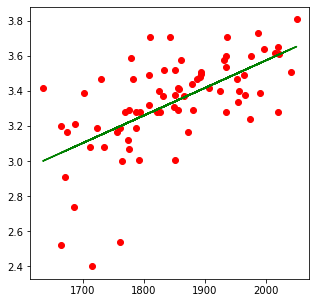

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, y_pred, color = "green")

### Evaluating Logistic Regression
#### Misclassification Error

Before evaluating Logistic Regression, let's do a probabilistic evaluation of errors on decision making.

Suppose that we have two classes $C = \{C_k: k \in \{1,2\}\}$ and we have random samples from a Gaussian Distribution, $x$. This samples are generated from two Gaussian Distribution. Let's denote this two Gussian Distribution as $C_1 \sim \mathcal{N}(\mu_1,\boldsymbol\sigma_1)$ and $C_2 \sim \mathcal{N}(\mu_1,\boldsymbol\sigma_1)$. Some samples are generated from first distribution that are correspond to class $C_1$ and others are generated from second distribution that are correspond to class $C_2$. As you can see; that implies, this is a binary classification task. In real life, our generated samples $x$ are not real data. But it is clear to see the concepts.

Now let's define our distributions. First, let's choose distribution of $C_1$ bimodal. In other words, it is concatenation of two Gaussian Distribution. Choose parameters for $C_1$, $\mu_{11} = -2$, $\mu_{12} = 25$, $\sigma_{11} = 5$, $\sigma_{12} = 7$. So, the distribution of $C_1$ is, 
$$p(x, C_{1_1}) = \frac{1}{5 \sqrt{2\pi}} \exp\left(\frac{-(x-(-2))^2}{2 \cdot 25}\right)$$
$$p(x, C_{1_1}) = \frac{1}{7 \sqrt{2\pi}} \exp\left(\frac{-(x-25)^2}{2 \cdot 49}\right)$$
$$p(x, C_{1}) = \left[\frac{1}{5 \sqrt{2\pi}} \exp\left(\frac{-(x-(-2))^2}{2 \cdot 25}\right);\frac{1}{7 \sqrt{2\pi}} \exp\left(\frac{-(x-25)^2}{2 \cdot 49}\right)\right]$$
And the distribution of $C_2$ as follows,
$$p(x, C_{1_1}) = \frac{1}{6 \sqrt{2\pi}} \exp\left(\frac{-(x-25)^2}{2 \cdot 36}\right)$$


[]

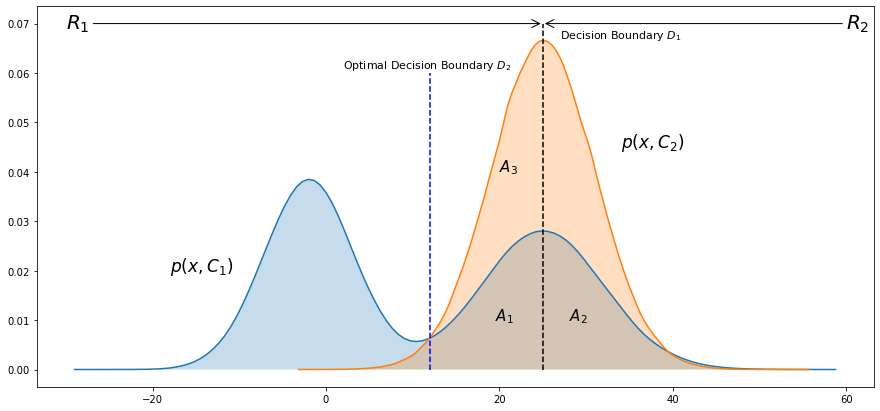

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean2, std2 = 25, 6

mean11, std11 = -2, 5
mean12, std12 = 25, 7
X1 = np.random.normal(mean11, std11, 100000)
X2 = np.random.normal(mean12, std12, 100000)
dist1 = np.concatenate([X1, X2])

dist2 = np.random.normal(mean2,std2,750000)

fig = plt.figure(figsize = (15,7))
sns.kdeplot(dist1, shade=True)
sns.kdeplot(dist2,shade=True)
x1, y1 = [25, 25], [0, 0.07]
x2, y2 = [12,12], [0, 0.06]
plt.plot(x2,y2,linestyle='dashed',color='blue')
plt.plot(x1,y1,linestyle='dashed',color='black')
plt.text(19.5, 0.01, '$A_1$',fontsize=15)
plt.text(28, 0.01, '$A_2$',fontsize=15)
plt.text(20, 0.04, '$A_3$',fontsize=15)
plt.annotate('$R_1$', xy=(25,0.07), xytext=(-30,0.07),
            arrowprops={'arrowstyle': '->'}, va='center',fontsize=20)
plt.annotate('$R_2$', xy=(25,0.07), xytext=(60,0.07),
            arrowprops={'arrowstyle': '->'}, va='center',fontsize=20)
plt.text(27, 0.067, 'Decision Boundary $D_1$',fontsize=11)
plt.text(2, 0.061, 'Optimal Decision Boundary $D_2$',fontsize=11)
plt.text(-18, 0.02, '$p(x,C_1)$',fontsize=17)
plt.text(34, 0.045, '$p(x,C_2)$',fontsize=17)
plt.plot()

We need a rule that assigns each value of $x$ to one of the available classes. Such a rule will divide the input space into regions $R_k$ called *decision regions*, one for each class, such that all points in $R_k$ are assigned into class $C_k$. The boundaries between decision regions are called *decision boundaries*.

A mistake occurs when an input vector belonging to class $C_1$ is assigned to class $C_2$ or vice versa. The probability of this occurrence is given by:

$$p(mistake) = p(x \in R_1, C_2) + p(x \in R_2, C_1)$$

$$= \int_{R_1}p(x,C_2)dx + \int_{R_2}p(x,C_1)dx$$

Clearly to minimize  $p(mistake)$, we should arrange that each $x$ is assigned to whichever class has smaller value of in the integrals. Thus, if $p(x,C_1) > p(x,C_2)$ for a given value of $x$, then we should assign that x to class $C_1$. From the product rule of probability, we have $p(x,C_k) = p(C_k | x) p(x)$. As you can see, both sides are divided by factor $p(x)$ which is common. So we can rewrite the inequality as $p(C_1 | x) > p(C_2 | x)$. This means that the minimum probability of making a mistake is obtained if each value of x is assigned to the class for which the posterior probability $p(C_k | x)$ is largest.

For the general case of multi-class tasks, we can easily say that maximizing the correctnes is slightly easier that minimizing the mistake

$$p(correct) = \sum_{k=1}^{K}p(x \in R_k, C_k)$$

$$= \sum_{k=1}^{K} \int_{R_k}p(x,C_k)dx$$

To explain the above figure, values of $x > D_1$ are classified as class $C_2$ and hence belong to decision region $R_2$. Whereas points $x < D_1$ classified as $C_1$ and belong to $R_1$. The mistake/error arise from regions $A_1, A_2$ and $A_3$. So that; for $x < D_1$, the errors are due to points from class $C_2$ being misclassified as $C_1$ (computed as sum  $A_1 + A_3$). And; for $x > D_1$,  the errors are due to points from class $C_1$ being misclassified as $C_2$ (area of $A_2$).

Actually, as you can see, the optimal choice for decision boundary is line $D_2$. Because in this case, region $A_3$ disappears. This is equivalent to the minimum misclassification rate decision rule, which assigns each value of $x$ to the class having the higher posterior probability $p(C_k | x)$.

Now let's apply what we learn above to evaluating Logistic regression.

#### Confusion Matrix